In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Question 1: 

## 1. Load CIFAR-10 dataset

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 92s 1us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 2. Add Random Noise

In [4]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [5]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## 3. Define Autoencoder Model

In [6]:
input_img = layers.Input(shape=(32, 32, 3))

### Encoder

In [7]:
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

### Decoder

In [8]:
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

### Autoencoder

In [9]:
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [10]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the Autoencoder

In [11]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.6079 - val_loss: 0.5788
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 0.5767 - val_loss: 0.5756
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 0.5745 - val_loss: 0.5750
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 0.5739 - val_loss: 0.5737
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.5729 - val_loss: 0.5732
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.5726 - val_loss: 0.5728
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.5714 - val_loss: 0.5724
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.5717 - val_loss: 0.5722
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.5714 - val_loss: 0.5723
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.5713 - val_loss: 0.5721
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.5706 - val_loss: 0.5718
Epoch 12/20
391/391 ━━━━━━━━━━

## 5. Predict on Test Data

In [12]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## 6. Visualization

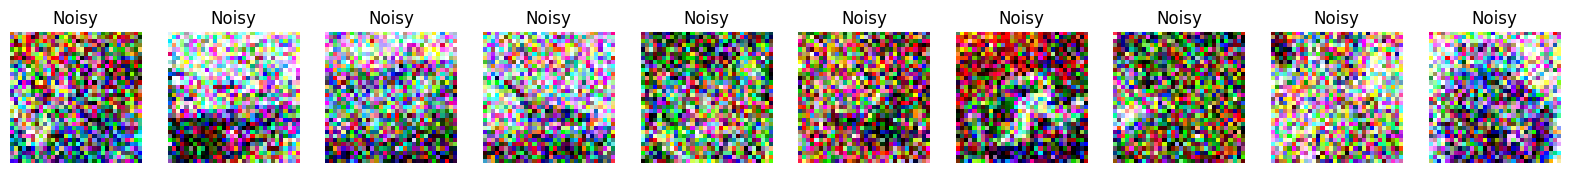

In [13]:
n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

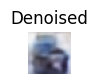

In [17]:
ax = plt.subplot(3, n, i + 1 + n)
plt.imshow(decoded_imgs[i])
plt.title("Denoised")
plt.axis("off")

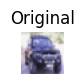

In [21]:
ax = plt.subplot(3, n, i + 1 + 2*n)
plt.imshow(x_test[i])
plt.title("Original")
plt.axis("off")
plt.show()

# Question 2:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10

## 1. Load & Preprocess CIFAR-10

In [24]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [25]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 2. VAE Parameters

In [26]:
latent_dim = 64   # size of latent space

## 3. Encoder

In [27]:
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

In [28]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

In [29]:
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")

In [30]:
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 64)  │     18,496 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4096)      │          0 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    524,416 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 64)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 560,320 (2.14 MB)

 Trainable params: 560,320 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Decoder

In [31]:
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation="relu", padding="same")(x)
outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)

In [32]:
decoder = Model(latent_inputs, outputs, name="decoder")

In [33]:
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │       266,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,499 (1.23 MB)

 Trainable params: 322,499 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Custom VAE Model

In [47]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):  # fit can pass (x, y)
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # reconstruction loss
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            # KL divergence
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                tf.keras.losses.binary_crossentropy(data, reconstruction),
                axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        _, _, z = self.encoder(inputs)
        return self.decoder(z)


## 5. Train

In [48]:
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam")   # notice: no `loss` needed
vae.fit(x_train, x_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - kl_loss: 5.7555 - loss: 650.2362 - reconstruction_loss: 644.4807 - val_kl_loss: 0.0000e+00 - val_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - kl_loss: 6.7428 - loss: 645.0792 - reconstruction_loss: 638.3363 - val_kl_loss: 0.0000e+00 - val_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - kl_loss: 6.7472 - loss: 645.5261 - reconstruction_loss: 638.7789 - val_kl_loss: 0.0000e+00 - val_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - kl_loss: 6.7676 - loss: 645.4030 - reconstruction_loss: 638.6353 - val_kl_loss: 0.0000e+00 - val_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - kl_loss: 6.7717 - loss: 644.5580 - reconstruction_loss: 637.7863 - val_kl_loss: 0.0000e+00 - val_loss: 0.0000e+0

## 6. Reconstruct Test Images

In [49]:
decoded_imgs = vae.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


## 7. Visualization

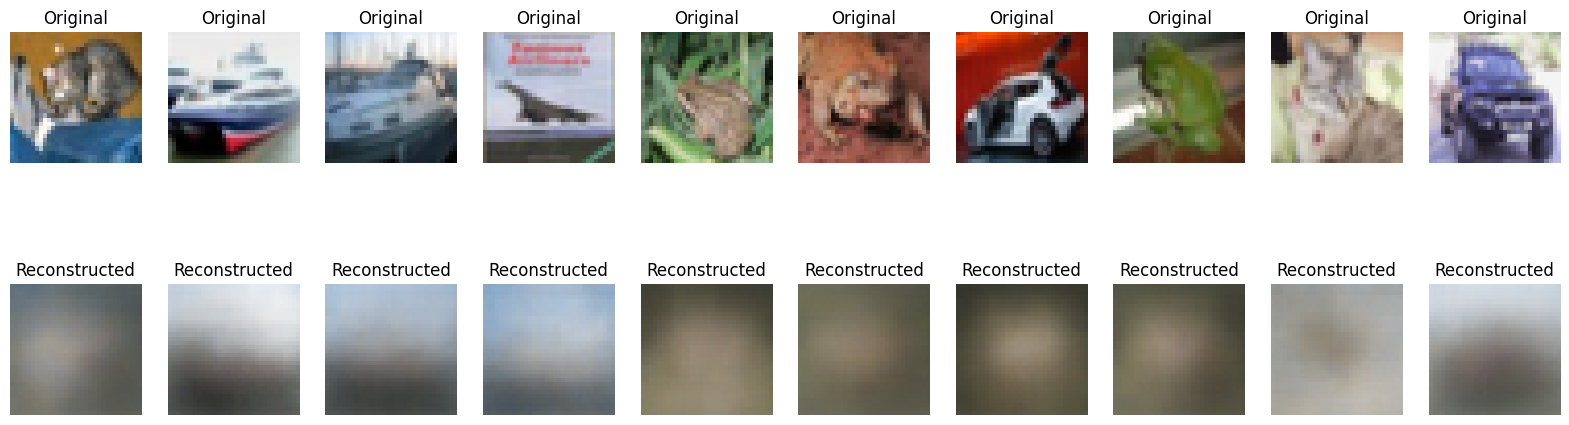

In [50]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()